**Decision Tree**

A Nonparametric Machine Learning Algorithm.

p: proba


---


**Gini Impurity**
:is a measure of how pure a set is : 2*p*(1-p)



---


**Entropy** :  is another measure of purity : -(p * log2(p) + (1-p) * log2(1-p))



---


**Information Gain** : H is our impurity measure (either Gini impurity or entropy). S is the original dataset and A and B are the two sets we’re splitting the dataset S into. In the first example above, A is passengers with Age<=30 and B is passengers with Age>30. In the second example, A is female passengers and B is male passengers. |A| means the size of A.  :  

H(S) – H(A)(|S| / |A|) - H(B)(|S| / |B|)







In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,  GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import graphviz
from IPython.display import Image

df = pd.read_csv('/content/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.predict([[3, True, 22, 1, 0, 7.25]]))

[0]


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
dt_accuracy_scores = []
dt_precision_scores = []
dt_recall_scores = []
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    dt_accuracy_scores.append(dt.score(X_test, y_test))
    dt_y_pred = dt.predict(X_test)
    dt_precision_scores.append(precision_score(y_test, dt_y_pred))
    dt_recall_scores.append(recall_score(y_test, dt_y_pred))
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_accuracy_scores.append(lr.score(X_test, y_test))
    lr_y_pred = lr.predict(X_test)
    lr_precision_scores.append(precision_score(y_test, lr_y_pred))
    lr_recall_scores.append(recall_score(y_test, lr_y_pred))
print("Decision Tree")
print("  accuracy:", np.mean(dt_accuracy_scores))
print("  precision:", np.mean(dt_precision_scores))
print("  recall:", np.mean(dt_recall_scores))
print("Logistic Regression")
print("  accuracy:", np.mean(lr_accuracy_scores))
print("  precision:", np.mean(lr_precision_scores))
print("  recall:", np.mean(lr_recall_scores))

Decision Tree
  accuracy: 0.7744873992255443
  precision: 0.7099194330668958
  recall: 0.706415398327163
Logistic Regression
  accuracy: 0.7970354853043865
  precision: 0.7618898922983288
  recall: 0.6900529617441382


In [12]:
kf = KFold(n_splits=5, shuffle=True)
for criterion in ['gini', 'entropy']:
    print("Decision Tree - {}".format(criterion))
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt = DecisionTreeClassifier(criterion=criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy))
    print("precision:", np.mean(precision))
    print("recall:", np.mean(recall), '\n')
    print()

Decision Tree - gini
accuracy: 0.7711927886751729
precision: 0.7156417431793828
recall: 0.6690784414056761 


Decision Tree - entropy
accuracy: 0.7620961086777123
precision: 0.7047516418008221
recall: 0.6714364770614255 




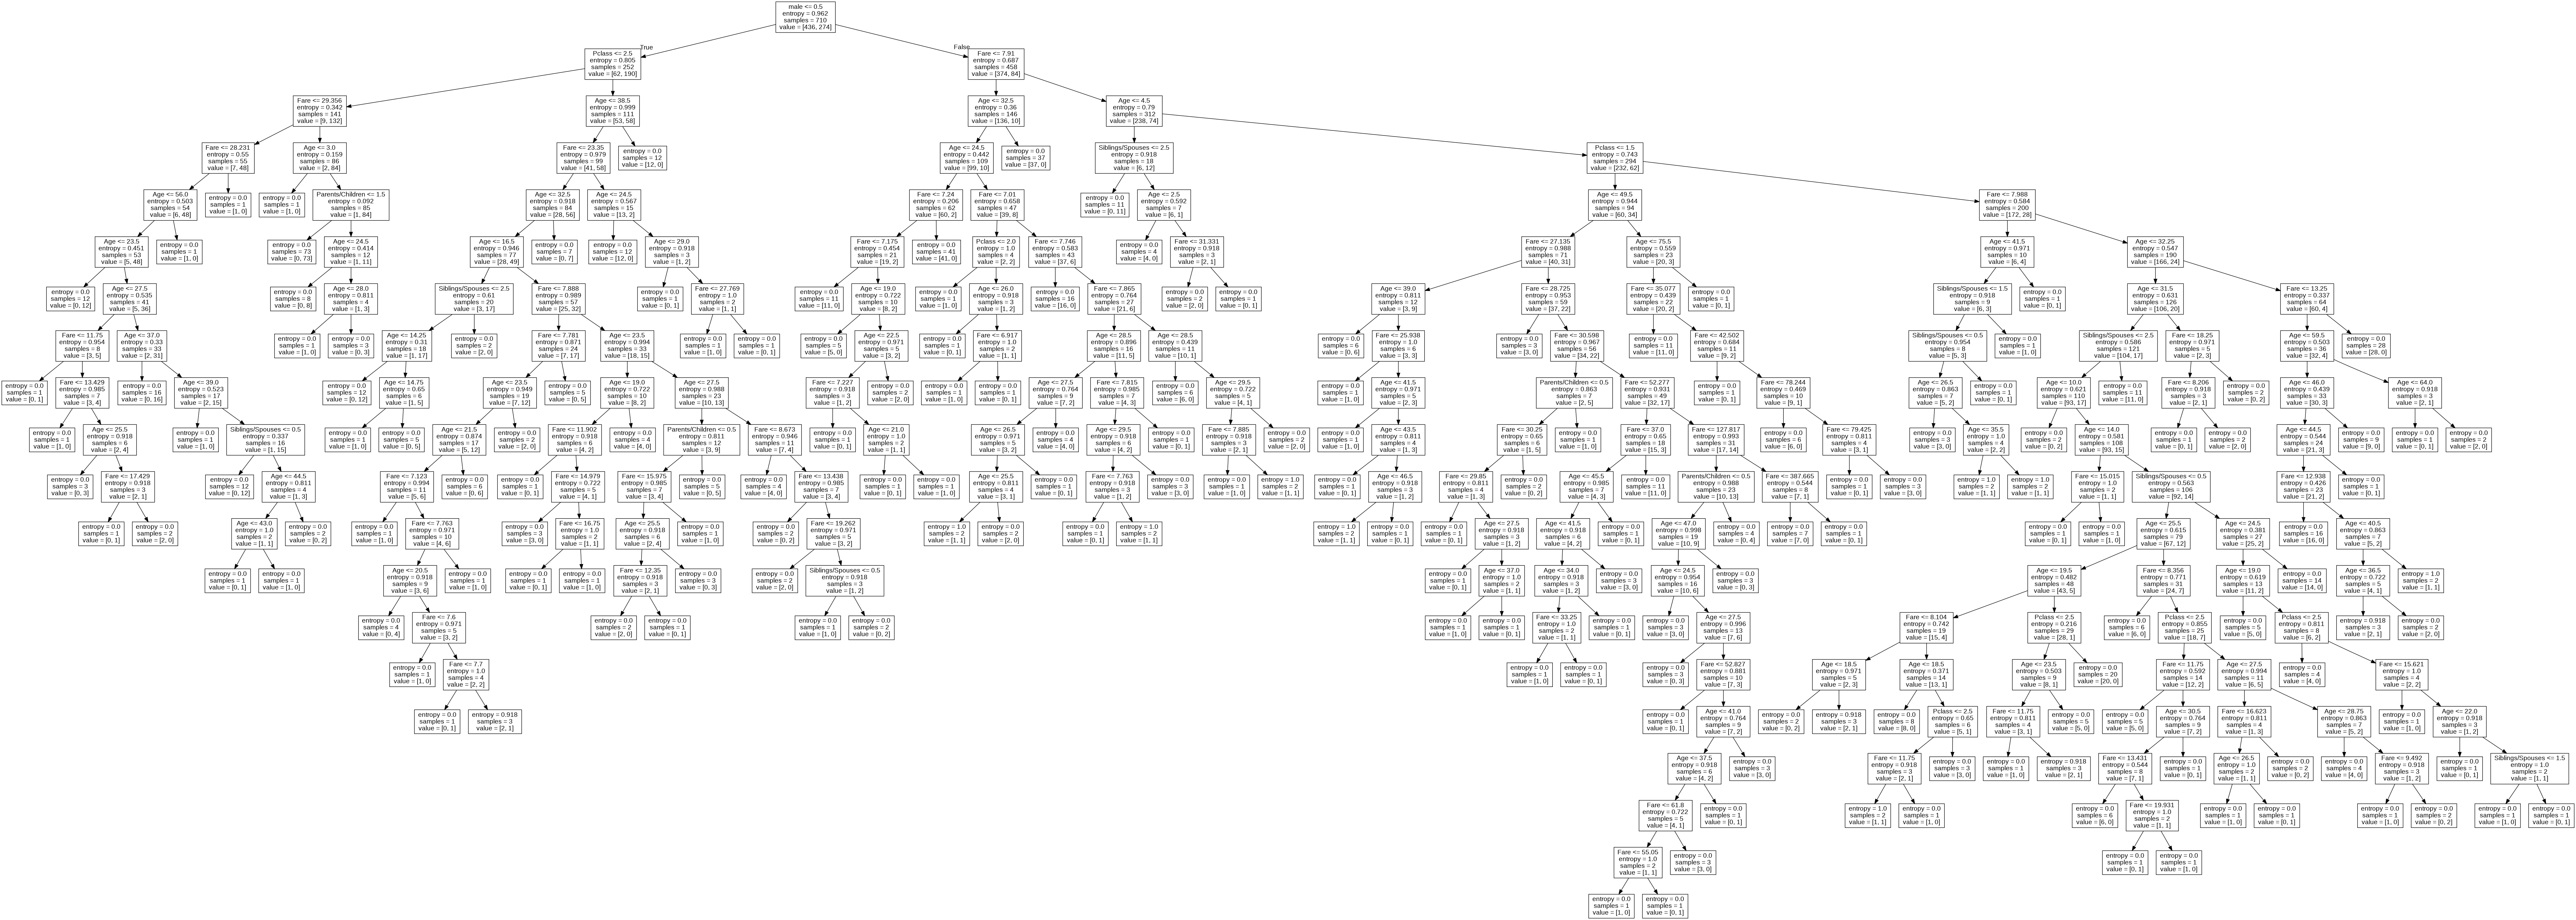

In [15]:
feature_names = ['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']
dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
Image(graph.render(filename='tree', format='png', cleanup=True))

In [21]:
#dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, max_leaf_nodes=10)
param_grid = {
    'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50]}
gs = GridSearchCV(dt, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)
print("best score:", gs.best_score_)

best params: {'max_depth': 15, 'max_leaf_nodes': 35, 'min_samples_leaf': 1}
best score: 0.7741858753148687
